# Import et Téléchargement du cif

In [18]:
from pymatgen import Structure
from matplotlib import pyplot as plt
from pymatgen import symmetry
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.core.operations import SymmOp
from pymatgen.analysis.diffraction import xrd
import numpy as np
with MPRester("izD7mJmnjhUOKyWGtZ") as m:
    structure = m.get_structure_by_material_id("mp-30847")
    w = CifWriter(structure)
    w.write_file('mp-30847cif')
 

# Calcul du graphe de diffractogramme
Ce notebook étudie le rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å envoyé sur le cristal TiSnPt . <br /> 
Une figure de diffraction se crée contenant des interférences constructives ainsi que des interférences destructives. Les pics du diffractrogramme ci-dessous, correspondent ainsi à des interférences constructives dont les intensités sont mises à l'échelle telle que l'intensité maximale soit 100.<br /> La position de ces pics , suivant la loi de Bragg, est donnée par la relation suivante : $n \lambda = 2d_{hkl} \sin \theta$ où $\theta $ correspond à l'ange de diffraction.

Nous étudierons les 3 premiers pics significatifs du diffractogramme. 

Graphe correspondant du pattern:
Les 3 premiers pics sont à theta=
[40.96193672 24.74503223 48.44606929]

leurs indices hkl associés:
[{'hkl': (1, 0, -1), 'multiplicity': 6}
 {'hkl': (1, 0, 0), 'multiplicity': 6}
 {'hkl': (1, 1, -1), 'multiplicity': 6}]

les 3 premiers pics par angle à apparaître:
[24.74503223 28.6490771  40.96193672]

leurs indices hkl associés:
[list([{'hkl': (1, 0, 0), 'multiplicity': 6}, {'hkl': (1, 1, 1), 'multiplicity': 2}])
 list([{'hkl': (1, 1, 0), 'multiplicity': 6}])
 list([{'hkl': (1, 0, -1), 'multiplicity': 6}, {'hkl': (2, 1, 1), 'multiplicity': 6}])]
leurs intensité relative:
[ 79.96546038   0.44609434 100.        ]
leurs distance interplanaire:
[3.59794411 3.115911   2.2032818 ]


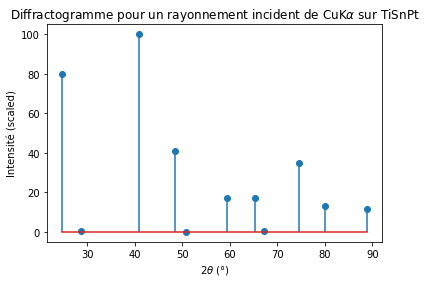

In [21]:
        cal =xrd.XRDCalculator()
        patter =cal.get_pattern(structure,two_theta_range=(0, 90))
    
        print("Graphe correspondant du pattern:")
        plt.xlabel(r"2$\theta$ (°)")
        plt.ylabel(r"Intensité (scaled)")
        plt.title(r"Diffractogramme pour un rayonnement incident de CuK$\alpha$ sur TiSnPt")
        plt.stem(patter.x,patter.y,use_line_collection=True)
        sorty =np.sort(patter.y)

        n =np.size(patter.x)
        sorteur =np.zeros(n)
        hkls =patter.hkls.copy()

        for i in range(0,n):
            index =np.where(patter.y == sorty[i])
            sorteur[i] =patter.x[index]
            hkls[i] =patter.hkls[index[0][0]][0]

        print("Les 3 premiers pics sont à theta=")
        pics =np.array([sorteur[n-1] ,sorteur[n-2] ,sorteur[n-3] ])
        print(pics)
        print("")

        print("leurs indices hkl associés:")
        picshkl =np.array([hkls[n-1] ,hkls[n-2] ,hkls[n-3] ])
        print(picshkl)
        print("")

        print("les 3 premiers pics par angle à apparaître:")
        picsangl =np.array([patter.x[0] ,patter.x[1] ,patter.x[2] ])
        print(picsangl)
        print("")

        print("leurs indices hkl associés:")
        picshkl2 =np.array([patter.hkls[0], patter.hkls[1] ,patter.hkls[2] ])
        print(picshkl2)
        
        print("leurs intensité relative:")
        picsint =np.array([patter.y[0], patter.y[1] ,patter.y[2] ])
        print(picsint)
        
        print("leurs distance interplanaire:")
        picsint =np.array([patter.d_hkls[0], patter.d_hkls[1] ,patter.d_hkls[2] ])
        print(picsint)

# Analyse des résultats
On trouve les 3 pics :
### Premier pic :
 Il se situe à 2$\theta$ = 24.74503223 <br /> 
 Son intensité sur le graphe est de 79.96546038 et la distance interplanaire est de 2.2032818  <br /> 
 Ses indices de Miller sont 'hkl': (1, 0, 0) de multiplicité 6 et 'hkl': (1, 1, 1) de multiplicité 2
 ### Deuxième pic :
 Il se situe à 2$\theta$ = 28.6490771 <br /> 
 Son intensité sur le graphe est de 0.44609434 et la distance interplanaire est de 3.115911  <br /> 
 Son indice de Miller est 'hkl': (1, 0, 0) de multiplicité 6
 ### Troisième pic:
 Il se situe à 2$\theta$ = 40.96193672 <br /> 
 Son intensité sur le graphe est de 100 et la distance interplanaire est de 2.2032818  <br /> 
 Ses indices de Miller sont 'hkl': (1, 0, -1) de multiplicité 6 et 'hkl': (2, 1, 1) de multiplicité 6